In [ ]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [ ]:
'''
Читаем данные из файла, и сразу смотрим заголовки столбцов (название фич) и первые 5 строк.

'''
file_path = '/content/sample_data/Modified_Cleaned_Students_Performance_2.csv'
dtf = pd.read_csv(file_path)

# Вывод первых строк
dtf.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,group B,bachelor's degree,1,0,72,72,74
1,0,group C,some college,1,1,69,90,88
2,0,group B,master's degree,1,0,90,95,93
3,1,group A,associate's degree,0,0,47,57,44
4,1,group C,some college,1,0,76,78,75


In [ ]:
dtf.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,group B,bachelor's degree,1,0,72,72,74
1,0,group C,some college,1,1,69,90,88
2,0,group B,master's degree,1,0,90,95,93
3,1,group A,associate's degree,0,0,47,57,44
4,1,group C,some college,1,0,76,78,75


In [ ]:
# Определение общего количества записей в наборе данных
total_records = len(dtf)
print(f"Общее количество записей в наборе данных: {total_records}")


Общее количество записей в наборе данных: 1000


In [ ]:
# Проверка наличия пропущенных значений
missing_values = dtf.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

# Проверка, имеются ли пропущенные значения
if missing_values.sum() > 0:
    print("В наборе данных имеются пропущенные значения.")
else:
    print("В наборе данных отсутствуют пропущенные значения.")


Количество пропущенных значений в каждом столбце:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64
В наборе данных отсутствуют пропущенные значения.


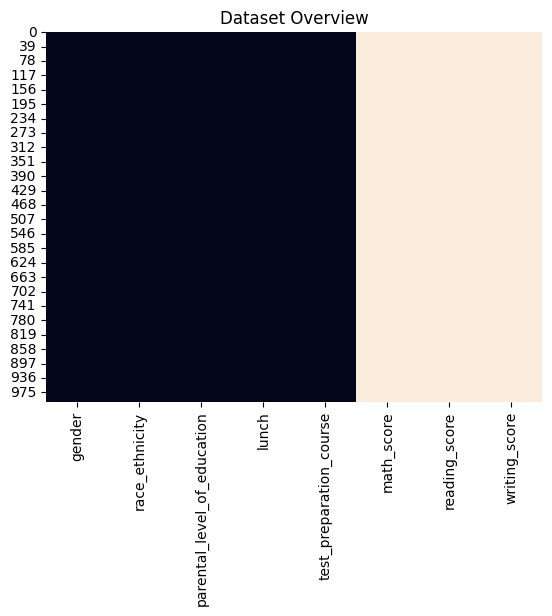

 Categerocial   Numeric   NaN 


In [ ]:
'''
формируем словарь dic_cols.
Ключи - название фич
Значение - категориальный (cat) или числовой (num)
'''
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}

'''
dtf.isnull() - возвращает датасет, который похож на изначальный датасет dtf, но в каждой ячейке вместо значений написано:
 False (если значение есть)
 True  (если в ячейке отсутствует значение)
'''
heatmap = dtf.isnull()

'''
А дальше проходим по столбцам, и меняем значения:
 если столбец числовой:
    пишем 0.5, если значение False (то есть оно не нулевое)
    пишем 1,   если значение True

 если столбец категориальный
    пишем 0, если значение False   (то есть оно не нулевое)
    пишем 1,   если значение True

После этого у нас окажется, что значения могут принимать всего три различных значения.
'''
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

'''
Строим heatmap (тепловую карту)
0.5 - если значение есть и оно числовое
0   - если значение есть и оно категориальное
1   - если значения в ячейке нет
'''
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')

plt.show()

'''
Печатаем внизу подобие легенды, раскрашивая так, как нужно.
'''
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

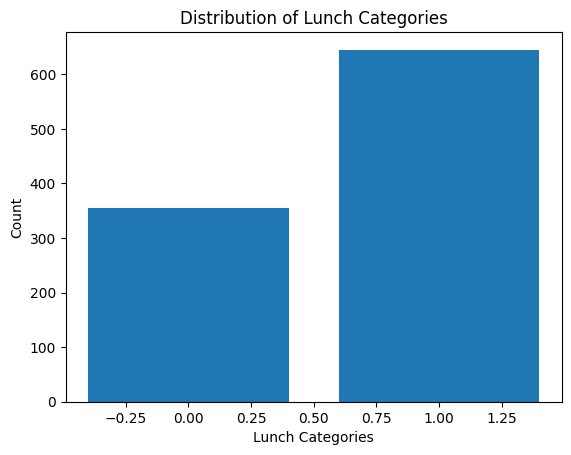

In [ ]:
# Подсчет количества категорий lunch
lunch_counts = dtf['lunch'].value_counts()

# Создание столбиковой диаграммы
plt.bar(lunch_counts.index, lunch_counts.values)
plt.xlabel('Lunch Categories')  # Название оси X
plt.ylabel('Count')  # Название оси Y
plt.title('Distribution of Lunch Categories')  # Заголовок
plt.show()


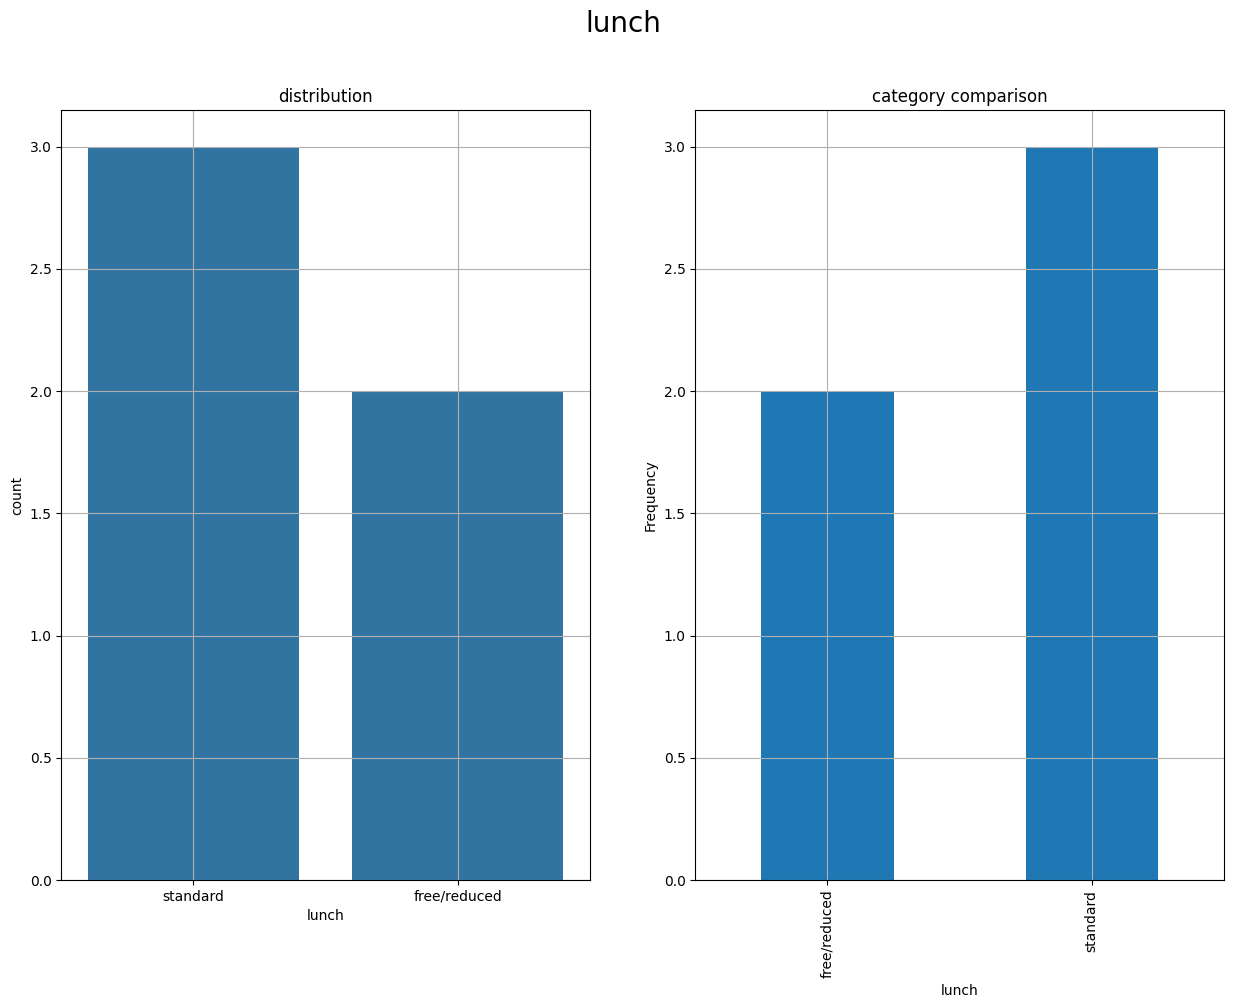

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Замените ваш DataFrame
dtfForThis = pd.DataFrame({
    "lunch": ["standard", "free/reduced", "standard", "free/reduced", "standard"]
})

# Выбор целевой переменной
x = "lunch"

# Создаем фигуру и оси
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(x, fontsize=20)  # Заголовок основного рисунка

### Распределение
ax[0].title.set_text('distribution')  # Название
sns.countplot(data=dtfForThis, x=x, ax=ax[0])  # Гистограмма распределения
ax[0].grid(True)

### boxplot
ax[1].title.set_text('category comparison')  # Заголовок
counts = dtfForThis[x].value_counts().sort_index()
counts.plot(kind='bar', ax=ax[1])
ax[1].set_xticks(range(len(counts.index)))
ax[1].set_xticklabels(counts.index)
ax[1].set_ylabel('Frequency')
ax[1].grid(True)

# Показываем графики
plt.show()


In [ ]:
def show_dist_math_score_by_lunch(x, group_by, dtf):
    """
    :param x: название столбца (например, math_score)
    :param group_by: столбец для группировки (например, lunch)
    :param dtf: датасет
    :return: ничего не возвращает
    """
    # Проверка наличия столбцов
    if x not in dtf.columns or group_by not in dtf.columns:
        raise KeyError(f"Один из столбцов ({x}, {group_by}) отсутствует в датасете")

    # Создаем фигуру и оси
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
    fig.suptitle(f"{x} by {group_by}", fontsize=20)

    ### Распределение оценок по категориям lunch
    ax[0].title.set_text(f'{x} distribution by {group_by}')
    sns.boxplot(data=dtf, x=group_by, y=x, ax=ax[0], palette="Set3")
    ax[0].set_xlabel("Lunch Categories")
    ax[0].set_ylabel(x)
    ax[0].grid(True)

    ### Средние значения math_score по категориям lunch
    ax[1].title.set_text(f'average {x} by {group_by}')
    group_means = dtf.groupby(group_by)[x].mean().sort_values()
    sns.barplot(x=group_means.index, y=group_means.values, ax=ax[1], palette="Set2")
    ax[1].set_xlabel("Lunch Categories")
    ax[1].set_ylabel(f'Average {x}')
    ax[1].grid(True)

    # Отображение
    plt.tight_layout()
    plt.show()


<ipython-input-37-8381c6f3e27d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dtf, x=group_by, y=x, ax=ax[0], palette="Set3")
<ipython-input-37-8381c6f3e27d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, ax=ax[1], palette="Set2")


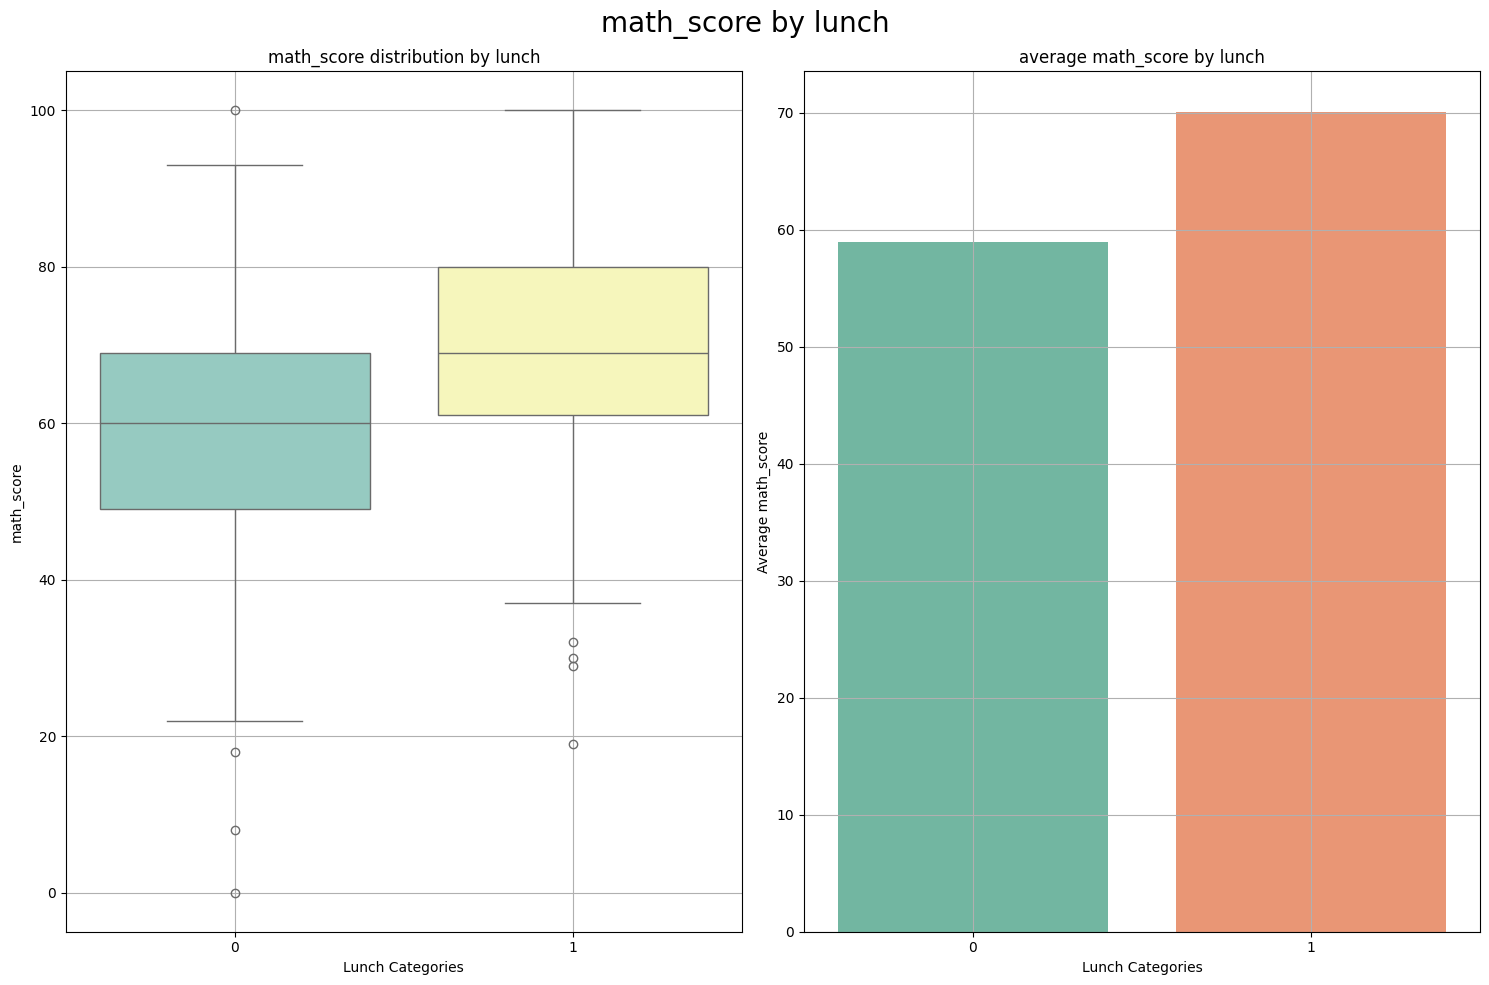

In [ ]:
show_dist_math_score_by_lunch("math_score", "lunch", dtf)


<ipython-input-39-65c9ff8c9eda>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=dtf, ax=ax[1], palette="Set3")  # Блочная диаграмма


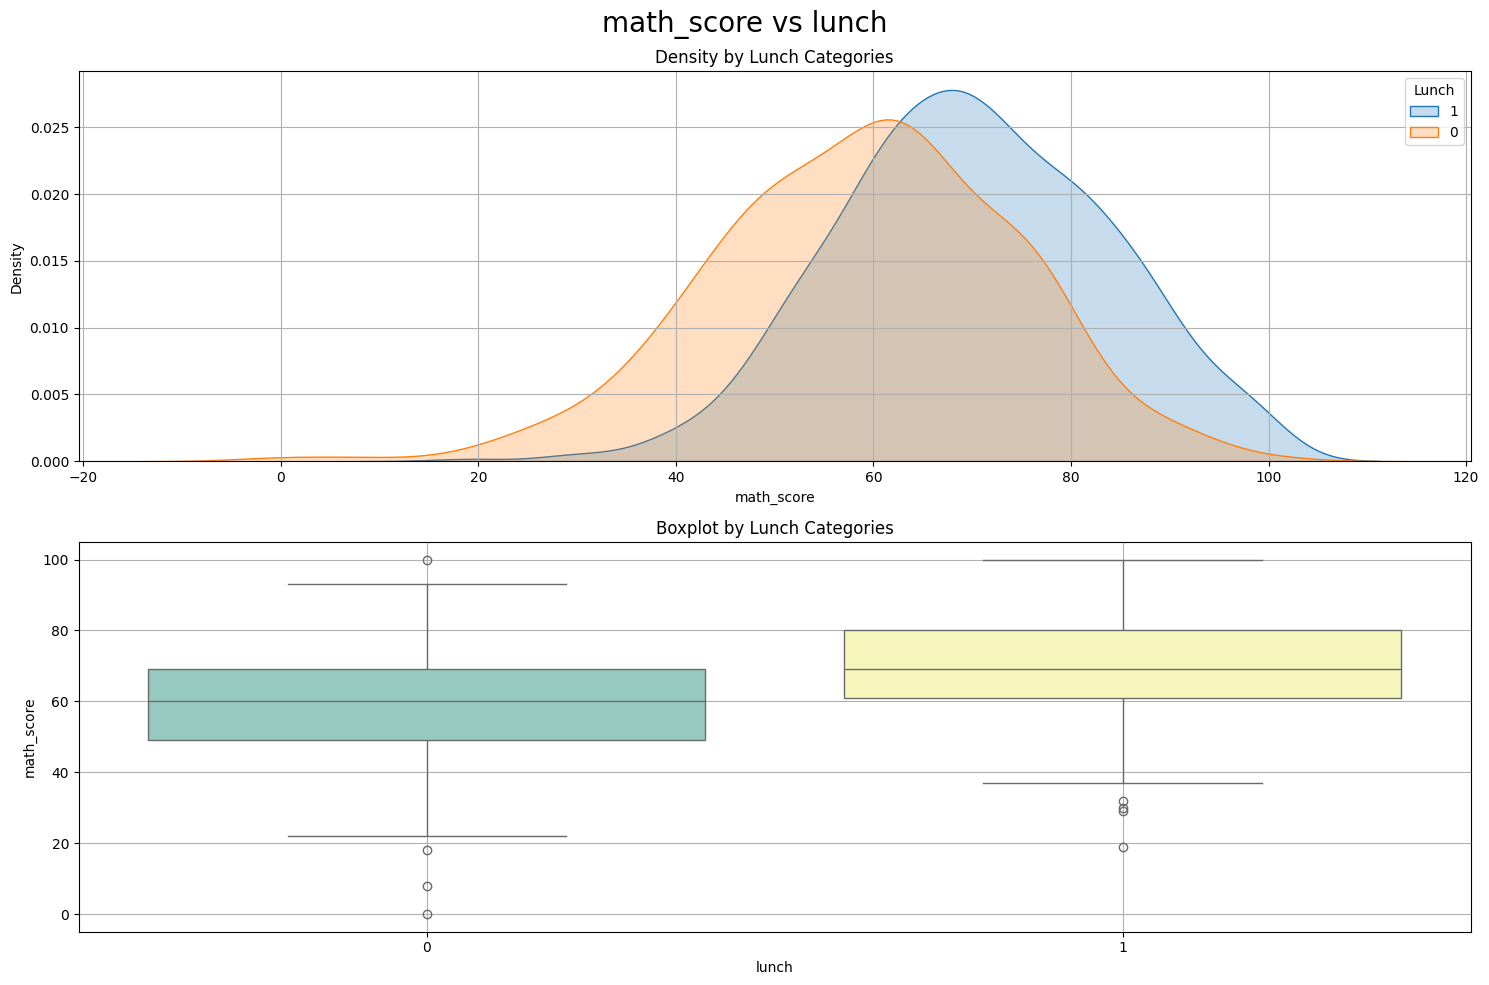

In [ ]:
# Определение переменных
cat, num = "lunch", "math_score"

# Создание фигуры и подграфиков
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(f"{num} vs {cat}", fontsize=20)

### График плотности
ax[0].title.set_text('Density by Lunch Categories')
for i in dtf[cat].unique():  # Перебираем уникальные значения lunch
    sns.kdeplot(dtf[dtf[cat] == i][num], label=i, ax=ax[0], fill=True)  # Строим график плотности
ax[0].legend(title="Lunch")
ax[0].grid(True)

### Boxplot
ax[1].title.set_text('Boxplot by Lunch Categories')
sns.boxplot(x=cat, y=num, data=dtf, ax=ax[1], palette="Set3")  # Блочная диаграмма
ax[1].grid(True)

# Отображение графиков
plt.tight_layout()
plt.show()


In [ ]:
# Преобразование текстовых столбцов в категориальные с заменой на числовые коды
columns_to_convert = ['race_ethnicity', 'parental_level_of_education']

for col in columns_to_convert:
    if col in df.columns:
        # Преобразование в категориальный тип (если еще не сделано)
        df[col] = df[col].astype('category')
        # Замена категорий на числовые коды
        df[col] = df[col].cat.codes

# Проверка преобразования
print(df.head())


   gender  race_ethnicity  parental_level_of_education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test_preparation_course  math_score  reading_score  writing_score  
0                        0          72             72             74  
1                        1          69             90             88  
2                        0          90             95             93  
3                        0          47             57             44  
4                        0          76             78             75  


In [ ]:
dtf.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,0,72,72,74
1,0,2,4,1,1,69,90,88
2,0,1,3,1,0,90,95,93
3,1,0,0,0,0,47,57,44
4,1,2,4,1,0,76,78,75


In [ ]:
df = dtf

In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,0,72,72,74
1,0,2,4,1,1,69,90,88
2,0,1,3,1,0,90,95,93
3,1,0,0,0,0,47,57,44
4,1,2,4,1,0,76,78,75


In [ ]:
 '''
    При разделении данных на обучающие и тестовые наборы вы должны следовать одному основному правилу:
        строки в обучающем наборе не должны также появляться в тестовом наборе.
        Это потому, что модель видит целевые значения во время обучения и использует их для понимания явления.
        Другими словами, модель уже знает правильный ответ для обучающих наблюдений (.
'''
from sklearn.model_selection import train_test_split  # Импорт train_test_split
import pandas as pd
import numpy as np

# Определяем целевую переменную и признаки
X = df.drop(columns=['lunch'])  # Все признаки, кроме lunch
y = df['lunch']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки (70% на обучение, 30% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Вывод информации о выборках
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)
print("y_train mean:", round(np.mean(y_train), 2), "| y_test mean:", round(np.mean(y_test), 2))
print(f"Признаки: {X_train.columns.to_list()}")

X_train shape: (700, 7) | X_test shape: (300, 7)
y_train mean: 0.66 | y_test mean: 0.62
Признаки: ['gender', 'race_ethnicity', 'parental_level_of_education', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Формируем датасеты для обучения и тестирования
train_x = X_train
train_y = y_train
test_x = X_test
test_y = y_test

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))  # Приведение значений к диапазону [0, 1]
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns, index=train_x.index)
test_x_scaled = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns, index=test_x.index)

# Проверка первых строк нормализованных данных
print(train_x_scaled.head())
print(train_y.head())


     gender  race_ethnicity  parental_level_of_education  \
541     1.0            0.75                          0.0   
440     0.0            0.50                          0.8   
482     1.0            0.50                          0.8   
422     0.0            0.75                          0.6   
778     0.0            0.00                          0.8   

     test_preparation_course  math_score  reading_score  writing_score  
541                      1.0    0.771739       0.763158       0.740260  
440                      1.0    0.641304       0.750000       0.727273  
482                      0.0    0.652174       0.578947       0.493506  
422                      1.0    0.423913       0.447368       0.571429  
778                      1.0    0.695652       0.723684       0.766234  
541    0
440    1
482    0
422    0
778    1
Name: lunch, dtype: int64


       gender  race_ethnicity  parental_level_of_education  \
521 -1.047808       -0.079897                    -1.374466   
737 -1.047808       -0.935936                     0.790048   
740  0.954373        0.776142                    -0.833338   
660  0.954373       -0.079897                     0.790048   
411  0.954373        1.632182                     0.790048   

     test_preparation_course  math_score  reading_score  writing_score  
521                -0.760886    1.656340       1.184277       1.085439  
737                 1.314257   -0.752728      -0.109543       0.402252  
740                -0.760886    0.958978       0.343294       0.340144  
660                -0.760886    0.578599       0.602058       0.402252  
411                 1.314257    1.212564       0.990204       0.712791  


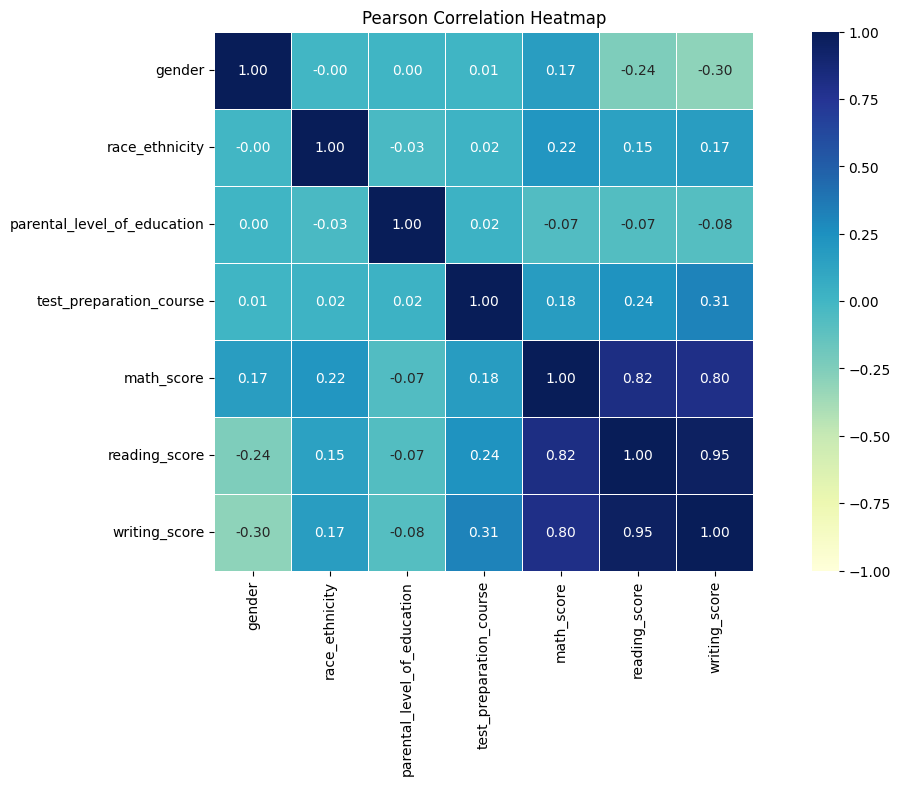

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Масштабирование данных тестового набора
scaler = StandardScaler()  # Используем StandardScaler для стандартного масштабирования
scaled_test_x = scaler.fit_transform(test_x)
test_x_scaled = pd.DataFrame(scaled_test_x, columns=test_x.columns, index=test_x.index)
test_y_scaled = test_y  # Целевая переменная остается без изменений

# Проверка первых строк нормализованных данных
print(test_x_scaled.head())

# Вычисление корреляционной матрицы
corr_matrix = df.drop(columns=["lunch"]).copy()  # Удаляем целевую переменную
for col in corr_matrix.columns:
    # Преобразуем категориальные переменные в числовые (если есть)
    if corr_matrix[col].dtype == "O":  # Если тип данных object
        corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]

# Построение корреляционной матрицы
corr_matrix = corr_matrix.corr(method="pearson", numeric_only=True)

# Визуализация корреляционной матрицы
plt.figure(figsize=(15, 7), dpi=100)
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, square=True)
plt.title("Pearson Correlation Heatmap")
plt.show()


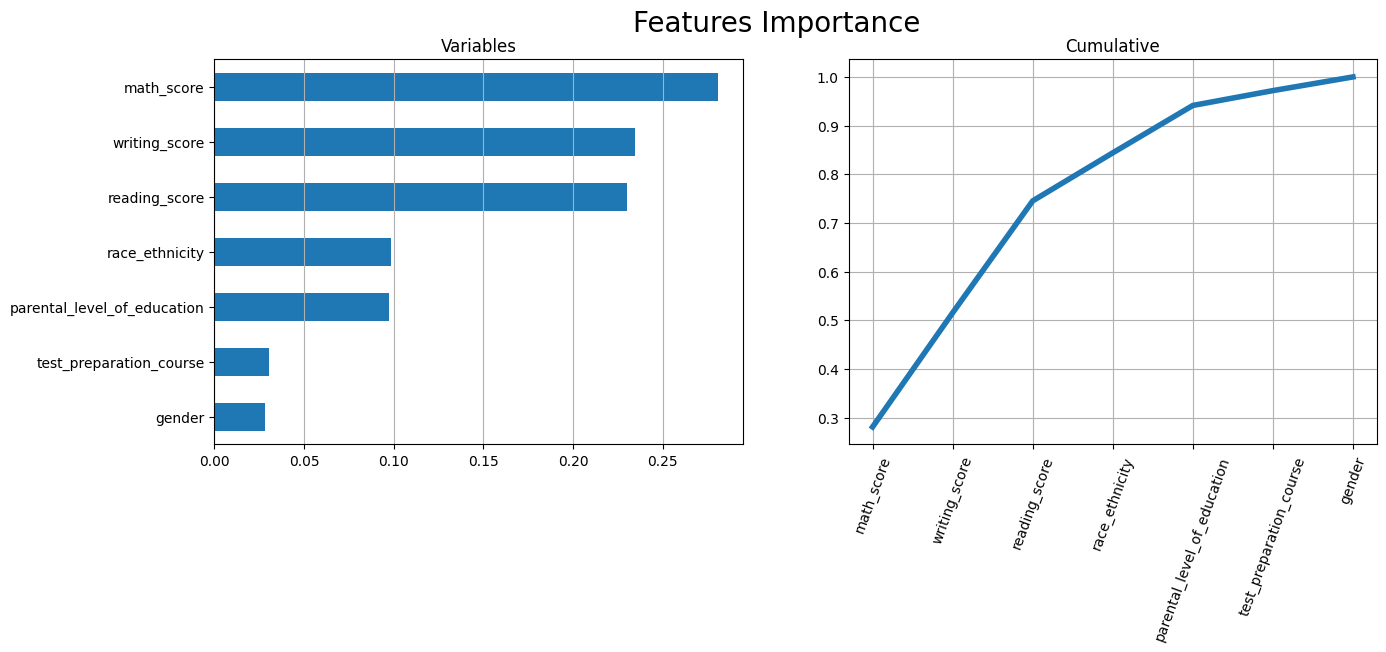

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Подготовка данных
X = train_x_scaled.values  # Признаки
y = train_y.values  # Целевая переменная
feature_names = train_x_scaled.columns.tolist()  # Имена признаков

# Создание модели RandomForestClassifier и обучение
model = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
model.fit(X, y)

# Вычисление важности признаков
importances = model.feature_importances_

# Создание DataFrame с результатами
dtf_importances = pd.DataFrame({"IMPORTANCE": importances, "VARIABLE": feature_names}).sort_values("IMPORTANCE", ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

# Визуализация важности признаков
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 5), dpi=100)
fig.suptitle("Features Importance", fontsize=20)

# График важности признаков
ax[0].title.set_text('Variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")

# Кумулятивная важность признаков
ax[1].title.set_text('Cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')

# Отображение графиков
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Выбор признаков для обучения
X_train = train_x_scaled[['gender', 'race_ethnicity', 'parental_level_of_education', 'math_score', 'reading_score', 'writing_score']]
y_train = train_y

X_test = test_x_scaled[['gender', 'race_ethnicity', 'parental_level_of_education', 'math_score', 'reading_score', 'writing_score']]
y_test = test_y

# Создание модели GradientBoostingClassifier
model = GradientBoostingClassifier()

# Гиперпараметры для подбора
param_dic = {
    'learning_rate': [0.15, 0.1, 0.05],
    'n_estimators': [100, 250, 500],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [2, 3, 4],
    'subsample': [0.7, 0.8, 0.9, 1]
}

# RandomizedSearchCV для подбора гиперпараметров
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dic,
    n_iter=10,
    scoring="accuracy",
    random_state=42
).fit(X_train, y_train)

# Лучшие параметры модели
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Прогнозирование вероятностей на тестовых данных
predicted_prob = model.predict_proba(X_test)

# Прогнозирование классов
predicted = model.predict(X_test).astype('int32')

# Оценка точности на тестовых данных
accuracy = accuracy_score(y_test, predicted)
print("Test Accuracy:", accuracy)

# Вывод прогнозов вероятностей
print("Predicted Probabilities (first 5 rows):")
print(predicted_prob[:5])


Best Model parameters: {'subsample': 1, 'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 4, 'max_depth': 4, 'learning_rate': 0.05}
Best Model mean accuracy: 0.6799999999999999
Test Accuracy: 0.5633333333333334
Predicted Probabilities (first 5 rows):
[[0.12051694 0.87948306]
 [0.96024389 0.03975611]
 [0.03712386 0.96287614]
 [0.51515693 0.48484307]
 [0.10240478 0.89759522]]


In [ ]:
from sklearn import metrics

# Accuracy (точность классификации)
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy (overall correct predictions):", round(accuracy, 2))

# AUC (площадь под ROC-кривой)
auc = metrics.roc_auc_score(y_test, predicted_prob[:, 1], multi_class='ovo', average="weighted")
print("AUC (Area Under the Curve):", round(auc, 2))

# Precision и Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall, 2))
print("Precision (confidence when predicting a 1):", round(precision, 2))

# Подробный отчет (classification report)
print("\nClassification Report:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))


Accuracy (overall correct predictions): 0.56
AUC (Area Under the Curve): 0.65
Recall (all 1s predicted right): 0.56
Precision (confidence when predicting a 1): 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.82      0.59       114
           1       0.79      0.40      0.53       186

    accuracy                           0.56       300
   macro avg       0.62      0.61      0.56       300
weighted avg       0.66      0.56      0.55       300



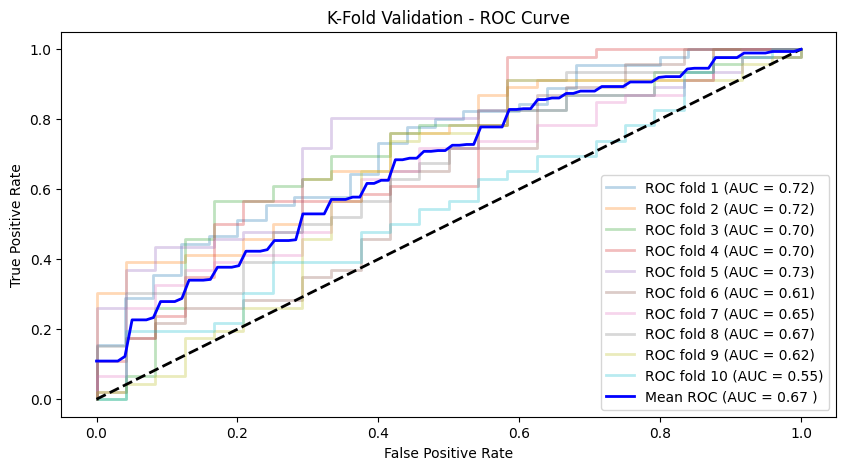

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# K-Fold Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)

# Фигура для ROC-кривых
fig = plt.figure(figsize=(10, 5), dpi=100)
i = 1

for train_idx, test_idx in cv.split(X_train, y_train):
    # Разделение данных на обучающую и тестовую части
    X_train_selected = X_train.iloc[train_idx]
    y_train_selected = y_train.iloc[train_idx]
    X_train_selected_test = X_train.iloc[test_idx]
    y_train_selected_test = y_train.iloc[test_idx]

    # Обучение модели и прогнозирование вероятностей
    prediction = model.fit(X_train_selected, y_train_selected).predict_proba(X_train_selected_test)

    # ROC и AUC
    fpr, tpr, _ = roc_curve(y_train_selected_test, prediction[:, 1], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))  # Интерполяция True Positive Rate
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Построение ROC для каждого фолда
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

# Средняя ROC-кривая
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')  # Линия случайного угадывания
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % mean_auc, lw=2, alpha=1)

# Оформление графика
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation - ROC Curve')
plt.legend(loc="lower right")

plt.show()


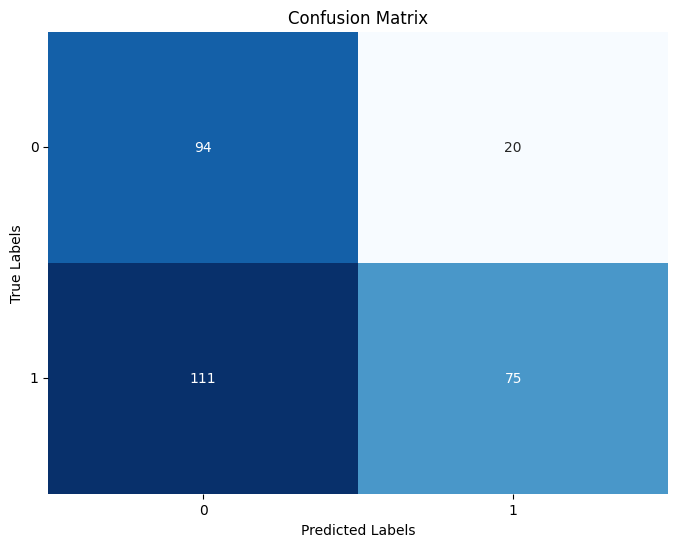

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Получение уникальных классов
classes = np.unique(y_test)

# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, predicted, labels=classes)

# Построение графика
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, xticklabels=classes, yticklabels=classes)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.set_yticklabels(labels=classes, rotation=0)

# Отображение графика
plt.show()


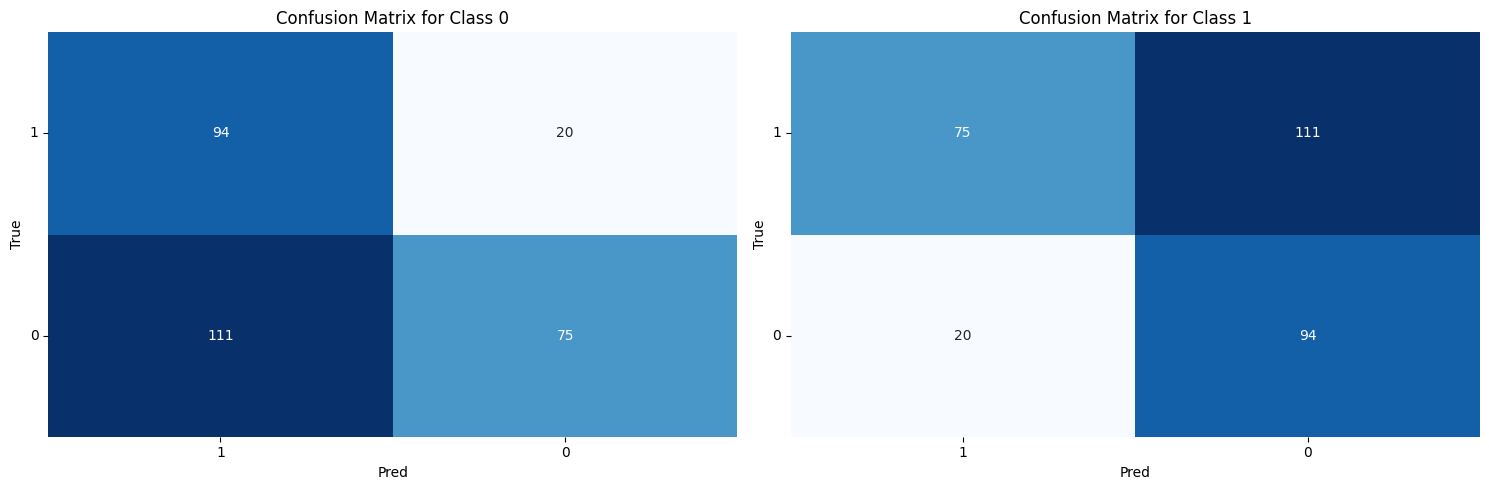

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Вспомогательная функция для создания бинарной классификации для каждого класса
def compute_class(ls_res, class_value):
    """
    Преобразует целевые значения в бинарный формат для заданного класса.
    """
    y_t_class = ls_res.copy().astype(int)
    y_t_class = y_t_class.apply(lambda c: 1 if c == class_value else 0)
    return y_t_class

# Уникальные классы
classes = np.unique(y_test).astype(int)
lbs = [1, 0]

# Построение графиков
fig, ax = plt.subplots(nrows=1, ncols=len(classes), figsize=(15, 5), dpi=100)

for idx, class_i in enumerate(classes):
    # Преобразуем истинные и предсказанные значения в бинарный формат для текущего класса
    y_one_class = compute_class(pd.Series(y_test.tolist()), class_i)
    predicted_one_class = compute_class(pd.Series(predicted.tolist()), class_i)

    # Вычисление матрицы ошибок
    cm = confusion_matrix(y_one_class, predicted_one_class, labels=lbs)

    # Визуализация матрицы ошибок
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, ax=ax[idx])
    ax[idx].set(xlabel="Pred", ylabel="True", title=f"Confusion Matrix for Class {class_i}")
    ax[idx].set_xticklabels(labels=lbs, rotation=0)
    ax[idx].set_yticklabels(labels=lbs, rotation=0)

# Отображение графиков
plt.tight_layout()
plt.show()


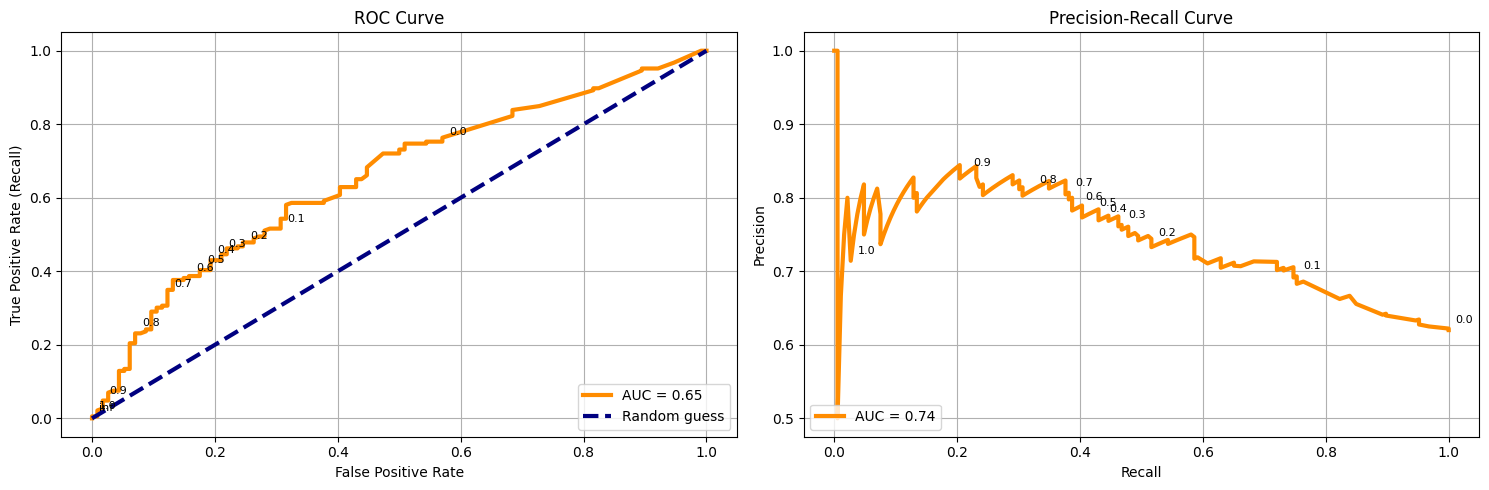

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Уникальные классы
classes = np.unique(y_test)

# Создание фигуры и осей
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), dpi=100)

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, predicted_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='AUC = %0.2f' % roc_auc)
ax[0].plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label="Random guess")
ax[0].set(xlabel='False Positive Rate', ylabel='True Positive Rate (Recall)', title='ROC Curve')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# Аннотируем пороговые значения для ROC
thres_in_plot = []
for i, t in enumerate(thresholds):
    t_rounded = np.round(t, 1)
    if t_rounded not in thres_in_plot:
        ax[0].annotate(t_rounded, xy=(fpr[i], tpr[i]), textcoords='offset points', xytext=(5, 5), fontsize=8)
        thres_in_plot.append(t_rounded)

# Precision-Recall кривая
precisions, recalls, thresholds = precision_recall_curve(y_test, predicted_prob[:, 1], pos_label=1)
pr_auc = auc(recalls, precisions)

ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='AUC = %0.2f' % pr_auc)
ax[1].set(xlabel='Recall', ylabel='Precision', title='Precision-Recall Curve')
ax[1].legend(loc='lower left')
ax[1].grid(True)

# Аннотируем пороговые значения для Precision-Recall
thres_in_plot = []
for i, t in enumerate(thresholds):
    t_rounded = np.round(t, 1)
    if t_rounded not in thres_in_plot:
        ax[1].annotate(t_rounded, xy=(recalls[i], precisions[i]), textcoords='offset points', xytext=(5, 5), fontsize=8)
        thres_in_plot.append(t_rounded)

# Отображение графиков
plt.tight_layout()
plt.show()


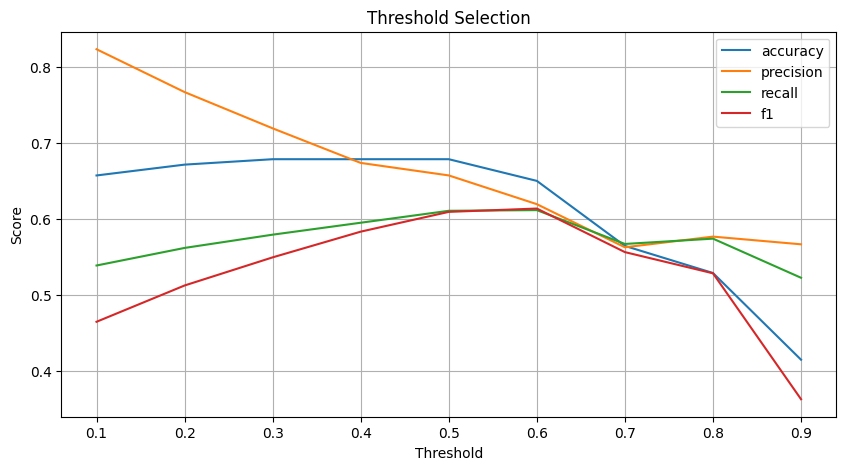

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Разделение данных для тестирования
XX_train, XX_test, yy_train, yy_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Прогнозирование вероятностей
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:, 1]

# Инициализация для подсчета метрик
dic_scores = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
thresholds = []

# Цикл по порогам (thresholds)
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold).astype(int)  # Классификация по порогу
    thresholds.append(threshold)
    dic_scores["accuracy"].append(accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(precision_score(yy_test, predicted, average='macro', zero_division=1))
    dic_scores["recall"].append(recall_score(yy_test, predicted, average='macro'))
    dic_scores["f1"].append(f1_score(yy_test, predicted, average='macro'))

# Построение графика
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

# Создание DataFrame из результатов
dtf_scores = pd.DataFrame(dic_scores, index=thresholds)
dtf_scores.plot(ax=ax)

# Оформление графика
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
plt.grid(True)

# Отображение графика
plt.show()
